<a href="https://colab.research.google.com/github/emichester/06MIAR_Aprendizaje_No_Supervisado/blob/main/MyTests/Tyre_Quality_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive mount

In [1]:
# montamos la unidad drive donde tenemos los datos en la carpeta drive/My Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/01_ML/00_Tyre_Quality"

/content/drive/MyDrive/Colab Notebooks/01_ML/00_Tyre_Quality


In [3]:
_base_path = "/content/drive/MyDrive/Colab Notebooks/01_ML/00_Tyre_Quality"

# Kaggle ops

In [4]:
!pip install -q kaggle

In [5]:
# from google.colab import files
# files.upload() # upload the kaggle token kaggle.json

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                        title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          14139        450  1.0              
joebeachcapital/students-performance                       Students Performance                            2KB  2023-08-31 00:50:11           4906        130  1.0              
iamsouravbanerjee/airline-dataset                          Airline Dataset                                 8MB  2023-09-13 06:47:17           5369        122  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target  Zzzs: Lightweight training dataset + target   185MB  202

In [8]:
# !kaggle datasets download -d nomihsa965/large-scale-image-dataset-of-wood-surface-defects

In [9]:
# !kaggle datasets download -d warcoder/tyre-quality-classification

In [10]:
# %mkdir -p "/content/drive/MyDrive/Colab Notebooks/01_ML/00_Tyre_Quality/kaggle/input"

In [11]:
# %mkdir "/content/drive/MyDrive/Colab Notebooks/01_ML/00_Tyre_Quality/kaggle/input/tyre-quality-classification"

In [12]:
# !unzip "/content/drive/MyDrive/Colab Notebooks/01_ML/00_Tyre_Quality/tyre-quality-classification.zip" -d "/content/drive/MyDrive/Colab Notebooks/01_ML/00_Tyre_Quality/kaggle/input/tyre-quality-classification"

In [13]:
%ls

checkpoints/         generated_plots/  kaggle.json
checkpoints_before/  kaggle/           tyre-quality-classification.zip


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,BatchNormalization,MaxPooling2D,Conv2D,Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import Model
from sklearn.metrics import classification_report , confusion_matrix

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    print (dirname)

./kaggle/input
./kaggle/input/tyre-quality-classification
./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres
./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective
./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/good
./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized_196
./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized


In [15]:
# good = glob.glob(r'./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/good/*.jpg')
# defective = glob.glob(r'./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective/*.jpg')

# random.shuffle(good)
# random.shuffle(defective)

# print ('number of good tyres : {} images'.format(len (good)))
# print ('number of defective tyres : {} images'.format(len (defective)))

In [16]:
# train_good = good [:int (len (good) *0.8)]
# test_good = good[int (len (good) *0.8):]

# train_defective = defective [:int (len (defective) *0.8)]
# test_defective = defective[int (len (defective) *0.8):]

# print ('number of train good tyres : {} images'.format(len (train_good)))
# print ('number of test good tyres : {} images'.format(len (test_good)))
# print ('number of train defective tyres : {} images'.format(len (train_defective)))
# print ('number of test defective tyres : {} images'.format(len (test_defective)))

(266, 266, 3)


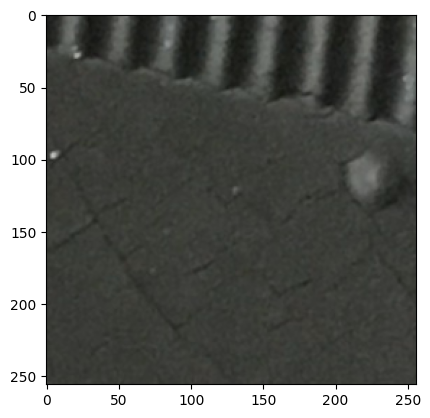

In [21]:
_path_folder = "./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective"
_all_images = glob.glob(_path_folder+"/*.jpg")
img = cv2.imread(_all_images[60])
print(img.shape)
# plt.imshow(img);
plt.figure()
# plt.imshow(cv2.resize(img, (192,192), interpolation=cv2.INTER_AREA));
plt.imshow(cv2.resize(img, (256,256), interpolation=cv2.INTER_AREA));

In [22]:
# %mkdir -p "./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

In [23]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

In [24]:
_path_folder_resized = "./kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

_max = len(glob.glob(_path_folder+"/*.jpg"))
out = display(progress(0, _max), display_id=True)
for ii,img_name in enumerate(glob.glob(_path_folder+"/*.jpg")):
  img = cv2.imread(img_name)
  img = cv2.resize(img, (256,256))
  cv2.imwrite(os.path.join(_path_folder_resized,os.path.basename(img_name)), img)
  out.update(progress(ii, _max))

## Código estudiado

## Mejoras
- [The architecture of DCGAN](https://www.researchgate.net/figure/The-architecture-of-DCGAN-a-generator-network-b-architecture-of-DCGAN-c-and_fig6_341605614)
- [Deep Convolutional GAN](https://paperswithcode.com/method/dcgan)
- [DCGAN-Keras](https://github.com/mitchelljy/DCGAN-Keras)

In [25]:
IMAGES_PATH = _path_folder_resized+"/*.jpg"
%mkdir -p "./checkpoints/"
%mkdir -p "./generated_plots/"

In [26]:
# importamos las librerías necesarias
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
# configuramos Colab para que nos muestre las imágenes más grandes
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [27]:
# # definimos el generador
# def define_generator(latent_dim):
#     model = Sequential(name="GENERATOR")
#     n_nodes = 256 * 24 * 24
#     model.add(Dense(n_nodes, input_dim=latent_dim))
#     model.add(LeakyReLU(alpha=0.2))
#     model.add(Reshape((24, 24, 256)))
#     # upsample a 8x8
#     model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
#     # upsample a 16x16
#     model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
#     # upsample a 32x32
#     model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
#     # salida (nuestra imagen fake)
#     model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
#     model.summary()
#     return model
# definimos el generador
def define_generator(latent_dim):
    model = Sequential(name="GENERATOR")
    n_nodes = 256 * 2 * 2
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((2, 2, 256)))
    # upsample
    model.add(Conv2DTranspose(260, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample
    model.add(Conv2DTranspose(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample
    model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample
    model.add(Conv2DTranspose(32, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample
    model.add(Conv2DTranspose(16, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample
    model.add(Conv2DTranspose(8, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample
    model.add(Conv2DTranspose(4, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # salida (nuestra imagen fake)
    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
    model.summary()
    return model

In [35]:
# # definimos el discriminador
# def define_discriminator(in_shape=(192,192,3)):
#     model = Sequential(name="DISCRIMINATOR")
#     # normal
#     model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
#     model.add(LeakyReLU(alpha=0.2))
#     # downsample (por el atributo 'strides')
#     model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
#     # downsample
#     model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
#     # downsample
#     model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
#     # clasificador
#     model.add(Flatten())
#     model.add(Dropout(0.4))
#     model.add(Dense(1, activation='sigmoid'))
#     # compilamos modelo
#     opt = Adam(learning_rate=0.0002, beta_1=0.5)
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#     model.summary()
#     return model
# definimos el discriminador
def define_discriminator(in_shape=(256,256,3)):
    model = Sequential(name="DISCRIMINATOR")
    # additional
    model.add(Conv2D(4, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(8, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # additional
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # normal
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample (por el atributo 'strides')
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(260, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # clasificador
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    # compilamos modelo
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    return model

In [29]:
# definimos el modelo GAN combinando generador y discriminador, para entrenar el generador
def define_gan(g_model, d_model):
    # Así que congelamos el discriminador:
    d_model.trainable = False
    # ahora conectamos el G(z) al D(x)
    model = Sequential()
    # añadimos el generador primero: él es el encargado de generar una muestra
    # a partir del espacio latente
    model.add(g_model)
    # y el discriminador después: le introducimos la muestra generada por el
    # G(z) para que nos diga si cree que es real o fake
    model.add(d_model)
    # y ahora sí, compilamos el modelo
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

In [30]:
def load_imgs(image_path=IMAGES_PATH):
    X_train = []
    for i in glob.glob(image_path):
        # img = Image.open(i)
        # img = np.asarray(img)
        img = cv2.imread(i)
        X_train.append(img)
    return np.asarray(X_train)

# definimos las funciones para cargar el MNIST
def load_real_samples():
    # cargamos el cifar10
    trainX = load_imgs()
    # convertimos a float32
    X = trainX.astype('float32')
    # escalamos entre -1 y 1 porque hemos puesto la función de activación
    # del generador tangente hiperbólica
    X = (X - 127.5) / 127.5
    return X

# nos creamos una función que nos devuelva n_samples del dataset con sus
# etiquetas (1)
def generate_real_samples(dataset, n_samples):
    # seleccionamos n_samples muestras aleatoriamente
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    # las cogemos
    X = dataset[ix]
    # generamos las etiquetas reales (1)
    y = np.ones((n_samples, 1))
    return X, y

In [31]:
# generamos los vectores latentes que introduciremos al generador
def generate_latent_points(latent_dim, batch_size):
    # generamos un vector de batch_size * latent_dim números aleatorios
    # latent_dim es la dimensión del vector latente
    # batch_size es el número de elementos por batch
    x_input = np.random.randn(latent_dim * batch_size)
    # redimensionamos el vector para que tenga un tamaño (batch_size, latent_dim)
    x_input = x_input.reshape(batch_size, latent_dim)
    return x_input

# creamos datos fake con el generador (dinero falsificado)
def generate_fake_samples(g_model, latent_dim, n_samples):
    # usamos la función anterior para generar los vectores latentes que
    # necesitamos para generar muestras fake
    x_input = generate_latent_points(latent_dim, n_samples)
    # le introducimos los vectores latentes al generador para obtener
    # muestras similares a las reales
    X = g_model.predict(x_input)
    # le asignamos la etiqueta 0 (porque utilizaremos esta función para
    # entrenar el D)
    y = np.zeros((n_samples, 1))
    return X, y

In [32]:
# función para guardar las imágenes generadas
def save_plot(examples, epoch, n=7):
	# escalamos de [-1,1] (la salida de nuestra gan, debido a la función de activación tanh) a [0,1]
	examples = (examples + 1) / 2.0
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i])
	# guardamos las imágenes
	filename = os.path.join(_base_path,'generated_plots','generated_plot_e%03d.png' % (epoch+1))
	plt.savefig(filename)
	plt.close()

In [33]:
# función para entrenar la GAN: el discriminador y el generador
def train(g_model, d_model, gan_model, dataset, latent_dim, start_epoch=0, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # bucle para las epochs
    for epoch in range(start_epoch, n_epochs):
        # bucle para los batch
        for batch in range(bat_per_epo):

            # en esta ocasión vamos a separar las pérdidas del discriminador
            # cuando le metemos imágenes reales y cuando le metemos imágenes
            # fake para ver cómo lo hace con cada tipo
            # recordad que lo ideal es que llegue a un 50% de acc en cada uno

            # preparamos los datos reales
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # actualizamos el discriminador
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)

            # generamos datos falsos
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # actualizamos el discriminador
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)

            # preparamos los puntos en el espacio latente: serán la entrada al
            # modelo GAN con el que entrenaremos el generador
            X_gan = generate_latent_points(latent_dim, n_batch)

            # creamos etiquetas invertidas para el generador: utilizamos el D(x)
            # para que piense que las muestras que le introducimos son reales, y
            # en caso de que diga que no son reales, aprovechamos la información
            # de sus gradientes para actualizar el G(z) para que la próxima vez
            # los datos generados por G(z) sean más plausibles (parecidos a los
            # reales)
            y_gan = np.ones((n_batch, 1))

            # como acabamos de ver, entrenamos el generador de forma que actualice
            # sus pesos usando los gradientes del discriminador
            # tened en cuenta que en este modelo (gan_model) el discriminador está
            # congelado, por lo que no se actualizan sus pesos: no queremos "untar"
            # a nuestro policía, lo que queremos es fabricar dinero más realista.
            g_loss = gan_model.train_on_batch(X_gan, y_gan)

            # mostramos el progreso
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                  (epoch+1, batch+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        # evaluate the model performance, sometimes
        if (epoch+1) % 10 == 0 or epoch == 0:
            # preparamos ejemplos reales
            X_real, y_real = generate_real_samples(dataset, n_batch)
            # evaluamos el discriminador con datos reales
            _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
            # preparamos ejemplos fake
            x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_batch)
            # evaluamos el discriminador con datos fake
            _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
            # mostramos cómo de bueno es nuestro policía
            print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
            # guardamos las imágenes generadas
            save_plot(x_fake, epoch)
            # guardamos el generador para tenerlo disponible más tarde
            filename = os.path.join(_base_path,'checkpoints','generator_model_%03d.h5' % (epoch + 1))
            g_model.save(filename)

## Training

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# si ya existe un checkpoint continúa
# create the generator
g_model = define_generator(latent_dim)
if len(sorted(os.listdir("./checkpoints/"))) > 0:
    _last_checkpoint = sorted(os.listdir("./checkpoints/"))[-1]
    _start_epoch = int(_last_checkpoint.split("_")[2].split(".")[0])+1
    g_model.load_weights(os.path.join("./checkpoints/",_last_checkpoint))
else:
    _start_epoch = 0
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, start_epoch=_start_epoch, n_epochs=1500, n_batch=256)

Model: "DISCRIMINATOR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 4)       112       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 256, 256, 4)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 8)       296       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 128, 128, 8)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 64, 64, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 10ms/step
>2, 1/4, d1=0.608, d2=0.696 g=0.693
4/4 [==============================] - 0s 7ms/step
>2, 2/4, d1=0.546, d2=0.696 g=0.693
4/4 [==============================] - 0s 7ms/step
>2, 3/4, d1=0.451, d2=0.695 g=0.694
4/4 [==============================] - 0s 7ms/step
>2, 4/4, d1=0.349, d2=0.697 g=0.696
4/4 [==============================] - 0s 7ms/step
>3, 1/4, d1=0.213, d2=0.690 g=0.701
4/4 [==============================] - 0s 7ms/step
>3, 2/4, d1=0.132, d2=0.687 g=0.707
4/4 [==============================] - 0s 6ms/step
>3, 3/4, d1=0.096, d2=0.681 g=0.718
4/4 [==============================] - 0s 7ms/step
>3, 4/4, d1=0.055, d2=0.668 g=0.734
4/4 [==============================] - 0s 7ms/step
>4, 1/4, d1=0.048, d2=0.651 g=0.758
4/4 [==============================] - 0s 7ms/step
>4, 2/4, d1=0.030, d2=0.629 g=0.794
4/4 [==============================] - 0s 8ms/step
>4, 3/4, d1=0.017, d2=0.598 g=0.844
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 13ms/step
>11, 1/4, d1=0.019, d2=0.017 g=4.814
4/4 [==============================] - 0s 7ms/step
>11, 2/4, d1=0.006, d2=0.018 g=4.772
4/4 [==============================] - 0s 7ms/step
>11, 3/4, d1=0.006, d2=0.018 g=4.758
4/4 [==============================] - 0s 8ms/step
>11, 4/4, d1=0.011, d2=0.020 g=4.820
4/4 [==============================] - 0s 7ms/step
>12, 1/4, d1=0.045, d2=0.035 g=4.855
4/4 [==============================] - 0s 7ms/step
>12, 2/4, d1=0.002, d2=0.015 g=5.181
4/4 [==============================] - 0s 7ms/step
>12, 3/4, d1=0.035, d2=0.018 g=4.996
4/4 [==============================] - 0s 7ms/step
>12, 4/4, d1=0.092, d2=0.097 g=5.534
4/4 [==============================] - 0s 7ms/step
>13, 1/4, d1=0.033, d2=0.005 g=5.728
4/4 [==============================] - 0s 7ms/step
>13, 2/4, d1=0.135, d2=0.024 g=3.597
4/4 [==============================] - 0s 7ms/step
>13, 3/4, d1=0.007, d2=0.141 g=4.539
4/4 [==========================

4/4 [==============================] - 0s 10ms/step
>21, 1/4, d1=0.031, d2=0.034 g=5.812
4/4 [==============================] - 0s 7ms/step
>21, 2/4, d1=0.025, d2=0.053 g=7.041
4/4 [==============================] - 0s 7ms/step
>21, 3/4, d1=0.040, d2=0.004 g=6.357
4/4 [==============================] - 0s 7ms/step
>21, 4/4, d1=0.047, d2=0.082 g=8.436
4/4 [==============================] - 0s 7ms/step
>22, 1/4, d1=0.198, d2=0.060 g=5.614
4/4 [==============================] - 0s 9ms/step
>22, 2/4, d1=0.002, d2=0.074 g=8.531
4/4 [==============================] - 0s 7ms/step
>22, 3/4, d1=0.012, d2=0.000 g=9.124
4/4 [==============================] - 0s 7ms/step
>22, 4/4, d1=0.024, d2=0.002 g=6.892
4/4 [==============================] - 0s 7ms/step
>23, 1/4, d1=0.007, d2=0.142 g=10.271
4/4 [==============================] - 0s 8ms/step
>23, 2/4, d1=0.107, d2=0.001 g=7.055
4/4 [==============================] - 0s 7ms/step
>23, 3/4, d1=0.037, d2=0.129 g=8.732
4/4 [=========================

4/4 [==============================] - 0s 13ms/step
>31, 1/4, d1=0.011, d2=0.021 g=5.433
4/4 [==============================] - 0s 7ms/step
>31, 2/4, d1=0.004, d2=0.010 g=5.556
4/4 [==============================] - 0s 7ms/step
>31, 3/4, d1=0.086, d2=0.018 g=5.038
4/4 [==============================] - 0s 7ms/step
>31, 4/4, d1=0.039, d2=0.021 g=4.963
4/4 [==============================] - 0s 8ms/step
>32, 1/4, d1=0.039, d2=0.017 g=4.987
4/4 [==============================] - 0s 6ms/step
>32, 2/4, d1=0.006, d2=0.016 g=5.268
4/4 [==============================] - 0s 7ms/step
>32, 3/4, d1=0.030, d2=0.024 g=4.952
4/4 [==============================] - 0s 7ms/step
>32, 4/4, d1=0.055, d2=0.024 g=4.563
4/4 [==============================] - 0s 7ms/step
>33, 1/4, d1=0.038, d2=0.042 g=5.295
4/4 [==============================] - 0s 7ms/step
>33, 2/4, d1=0.113, d2=0.016 g=5.121
4/4 [==============================] - 0s 7ms/step
>33, 3/4, d1=0.101, d2=0.031 g=4.878
4/4 [==========================

4/4 [==============================] - 0s 13ms/step
>41, 1/4, d1=0.021, d2=0.008 g=5.767
4/4 [==============================] - 0s 7ms/step
>41, 2/4, d1=0.068, d2=0.046 g=4.948
4/4 [==============================] - 0s 7ms/step
>41, 3/4, d1=0.003, d2=0.013 g=5.586
4/4 [==============================] - 0s 7ms/step
>41, 4/4, d1=0.003, d2=0.008 g=5.454
4/4 [==============================] - 0s 8ms/step
>42, 1/4, d1=0.014, d2=0.017 g=5.432
4/4 [==============================] - 0s 7ms/step
>42, 2/4, d1=0.112, d2=0.095 g=7.259
4/4 [==============================] - 0s 8ms/step
>42, 3/4, d1=0.169, d2=0.001 g=6.907
4/4 [==============================] - 0s 7ms/step
>42, 4/4, d1=0.091, d2=0.003 g=5.691
4/4 [==============================] - 0s 7ms/step
>43, 1/4, d1=0.125, d2=0.048 g=5.359
4/4 [==============================] - 0s 7ms/step
>43, 2/4, d1=0.003, d2=0.006 g=5.700
4/4 [==============================] - 0s 7ms/step
>43, 3/4, d1=0.030, d2=0.017 g=5.047
4/4 [==========================

4/4 [==============================] - 0s 13ms/step
>51, 1/4, d1=0.000, d2=1.552 g=7.815
4/4 [==============================] - 0s 7ms/step
>51, 2/4, d1=0.023, d2=0.000 g=10.813
4/4 [==============================] - 0s 7ms/step
>51, 3/4, d1=1.228, d2=0.009 g=6.622
4/4 [==============================] - 0s 8ms/step
>51, 4/4, d1=0.114, d2=0.011 g=4.937
4/4 [==============================] - 0s 7ms/step
>52, 1/4, d1=0.026, d2=0.040 g=4.364
4/4 [==============================] - 0s 7ms/step
>52, 2/4, d1=0.039, d2=0.027 g=4.125
4/4 [==============================] - 0s 7ms/step
>52, 3/4, d1=0.119, d2=0.033 g=3.813
4/4 [==============================] - 0s 8ms/step
>52, 4/4, d1=0.025, d2=0.039 g=3.595
4/4 [==============================] - 0s 7ms/step
>53, 1/4, d1=0.123, d2=0.056 g=3.466
4/4 [==============================] - 0s 7ms/step
>53, 2/4, d1=0.086, d2=0.050 g=3.398
4/4 [==============================] - 0s 7ms/step
>53, 3/4, d1=0.055, d2=0.062 g=3.329
4/4 [=========================

4/4 [==============================] - 0s 11ms/step
>61, 1/4, d1=0.133, d2=0.023 g=4.487
4/4 [==============================] - 0s 7ms/step
>61, 2/4, d1=0.094, d2=0.024 g=4.247
4/4 [==============================] - 0s 7ms/step
>61, 3/4, d1=0.017, d2=0.027 g=4.421
4/4 [==============================] - 0s 8ms/step
>61, 4/4, d1=0.062, d2=0.025 g=4.572
4/4 [==============================] - 0s 6ms/step
>62, 1/4, d1=0.021, d2=0.021 g=4.767
4/4 [==============================] - 0s 7ms/step
>62, 2/4, d1=0.085, d2=0.025 g=4.663
4/4 [==============================] - 0s 7ms/step
>62, 3/4, d1=0.069, d2=0.021 g=4.669
4/4 [==============================] - 0s 7ms/step
>62, 4/4, d1=0.119, d2=0.043 g=4.869
4/4 [==============================] - 0s 7ms/step
>63, 1/4, d1=0.065, d2=0.012 g=4.997
4/4 [==============================] - 0s 7ms/step
>63, 2/4, d1=0.062, d2=0.019 g=4.772
4/4 [==============================] - 0s 7ms/step
>63, 3/4, d1=0.054, d2=0.024 g=4.582
4/4 [==========================

4/4 [==============================] - 0s 11ms/step
>71, 1/4, d1=0.104, d2=0.022 g=4.597
4/4 [==============================] - 0s 8ms/step
>71, 2/4, d1=0.042, d2=0.034 g=4.695
4/4 [==============================] - 0s 7ms/step
>71, 3/4, d1=0.040, d2=0.013 g=5.051
4/4 [==============================] - 0s 7ms/step
>71, 4/4, d1=0.041, d2=0.011 g=5.115
4/4 [==============================] - 0s 7ms/step
>72, 1/4, d1=0.002, d2=0.011 g=5.188
4/4 [==============================] - 0s 7ms/step
>72, 2/4, d1=0.027, d2=0.013 g=5.170
4/4 [==============================] - 0s 7ms/step
>72, 3/4, d1=0.136, d2=0.022 g=4.734
4/4 [==============================] - 0s 7ms/step
>72, 4/4, d1=0.024, d2=0.034 g=5.896
4/4 [==============================] - 0s 7ms/step
>73, 1/4, d1=0.097, d2=0.007 g=5.588
4/4 [==============================] - 0s 7ms/step
>73, 2/4, d1=0.064, d2=0.016 g=4.919
4/4 [==============================] - 0s 8ms/step
>73, 3/4, d1=0.091, d2=0.046 g=6.151
4/4 [==========================

4/4 [==============================] - 0s 13ms/step
>81, 1/4, d1=0.005, d2=0.014 g=4.719
4/4 [==============================] - 0s 7ms/step
>81, 2/4, d1=0.045, d2=0.014 g=4.535
4/4 [==============================] - 0s 7ms/step
>81, 3/4, d1=0.009, d2=0.015 g=4.516
4/4 [==============================] - 0s 7ms/step
>81, 4/4, d1=0.059, d2=0.026 g=4.211
4/4 [==============================] - 0s 7ms/step
>82, 1/4, d1=0.006, d2=0.033 g=4.801
4/4 [==============================] - 0s 8ms/step
>82, 2/4, d1=0.076, d2=0.018 g=5.092
4/4 [==============================] - 0s 8ms/step
>82, 3/4, d1=0.059, d2=0.033 g=5.606
4/4 [==============================] - 0s 9ms/step
>82, 4/4, d1=0.069, d2=0.006 g=5.886
4/4 [==============================] - 0s 9ms/step
>83, 1/4, d1=0.050, d2=0.010 g=5.454
4/4 [==============================] - 0s 7ms/step
>83, 2/4, d1=0.068, d2=0.261 g=11.214
4/4 [==============================] - 0s 7ms/step
>83, 3/4, d1=1.783, d2=0.172 g=5.633
4/4 [=========================

4/4 [==============================] - 0s 12ms/step
>91, 1/4, d1=0.197, d2=0.063 g=5.573
4/4 [==============================] - 0s 7ms/step
>91, 2/4, d1=0.201, d2=0.018 g=4.648
4/4 [==============================] - 0s 7ms/step
>91, 3/4, d1=0.025, d2=0.038 g=3.887
4/4 [==============================] - 0s 7ms/step
>91, 4/4, d1=0.038, d2=0.042 g=4.496
4/4 [==============================] - 0s 8ms/step
>92, 1/4, d1=0.073, d2=0.038 g=4.519
4/4 [==============================] - 0s 7ms/step
>92, 2/4, d1=0.234, d2=0.194 g=6.895
4/4 [==============================] - 0s 7ms/step
>92, 3/4, d1=0.875, d2=0.028 g=3.280
4/4 [==============================] - 0s 7ms/step
>92, 4/4, d1=0.133, d2=0.123 g=2.894
4/4 [==============================] - 0s 7ms/step
>93, 1/4, d1=0.047, d2=0.070 g=3.606
4/4 [==============================] - 0s 7ms/step
>93, 2/4, d1=0.106, d2=0.046 g=3.649
4/4 [==============================] - 0s 7ms/step
>93, 3/4, d1=0.049, d2=0.036 g=3.941
4/4 [==========================

4/4 [==============================] - 0s 13ms/step
>101, 1/4, d1=0.248, d2=0.030 g=3.342
4/4 [==============================] - 0s 8ms/step
>101, 2/4, d1=0.054, d2=0.177 g=5.630
4/4 [==============================] - 0s 7ms/step
>101, 3/4, d1=0.708, d2=0.027 g=3.687
4/4 [==============================] - 0s 7ms/step
>101, 4/4, d1=0.586, d2=0.210 g=2.030
4/4 [==============================] - 0s 7ms/step
>102, 1/4, d1=0.065, d2=0.202 g=2.871
4/4 [==============================] - 0s 7ms/step
>102, 2/4, d1=0.062, d2=0.055 g=3.541
4/4 [==============================] - 0s 7ms/step
>102, 3/4, d1=0.100, d2=0.046 g=3.523
4/4 [==============================] - 0s 7ms/step
>102, 4/4, d1=0.080, d2=0.053 g=3.486
4/4 [==============================] - 0s 7ms/step
>103, 1/4, d1=0.093, d2=0.055 g=3.515
4/4 [==============================] - 0s 7ms/step
>103, 2/4, d1=0.150, d2=0.081 g=3.721
4/4 [==============================] - 0s 7ms/step
>103, 3/4, d1=0.121, d2=0.064 g=3.801
4/4 [===============

4/4 [==============================] - 0s 12ms/step
>111, 1/4, d1=0.089, d2=0.067 g=3.509
4/4 [==============================] - 0s 7ms/step
>111, 2/4, d1=0.092, d2=0.072 g=3.338
4/4 [==============================] - 0s 7ms/step
>111, 3/4, d1=0.055, d2=0.067 g=3.791
4/4 [==============================] - 0s 8ms/step
>111, 4/4, d1=0.086, d2=0.057 g=3.933
4/4 [==============================] - 0s 7ms/step
>112, 1/4, d1=0.155, d2=0.057 g=3.672
4/4 [==============================] - 0s 9ms/step
>112, 2/4, d1=0.118, d2=0.070 g=3.896
4/4 [==============================] - 0s 7ms/step
>112, 3/4, d1=0.077, d2=0.040 g=4.028
4/4 [==============================] - 0s 7ms/step
>112, 4/4, d1=0.165, d2=0.096 g=4.649
4/4 [==============================] - 0s 7ms/step
>113, 1/4, d1=0.202, d2=0.024 g=3.827
4/4 [==============================] - 0s 7ms/step
>113, 2/4, d1=0.133, d2=0.071 g=3.847
4/4 [==============================] - 0s 7ms/step
>113, 3/4, d1=0.043, d2=0.032 g=3.931
4/4 [===============

4/4 [==============================] - 0s 12ms/step
>121, 1/4, d1=0.176, d2=0.084 g=3.261
4/4 [==============================] - 0s 7ms/step
>121, 2/4, d1=0.129, d2=0.069 g=3.424
4/4 [==============================] - 0s 7ms/step
>121, 3/4, d1=0.212, d2=0.088 g=3.412
4/4 [==============================] - 0s 7ms/step
>121, 4/4, d1=0.181, d2=0.085 g=3.475
4/4 [==============================] - 0s 7ms/step
>122, 1/4, d1=0.337, d2=0.113 g=3.159
4/4 [==============================] - 0s 7ms/step
>122, 2/4, d1=0.152, d2=0.090 g=3.364
4/4 [==============================] - 0s 7ms/step
>122, 3/4, d1=0.222, d2=0.083 g=3.337
4/4 [==============================] - 0s 7ms/step
>122, 4/4, d1=0.160, d2=0.076 g=3.427
4/4 [==============================] - 0s 7ms/step
>123, 1/4, d1=0.266, d2=0.090 g=3.064
4/4 [==============================] - 0s 8ms/step
>123, 2/4, d1=0.131, d2=0.075 g=3.300
4/4 [==============================] - 0s 8ms/step
>123, 3/4, d1=0.173, d2=0.075 g=3.305
4/4 [===============

4/4 [==============================] - 0s 11ms/step
>131, 1/4, d1=0.127, d2=0.078 g=3.225
4/4 [==============================] - 0s 7ms/step
>131, 2/4, d1=0.235, d2=0.124 g=3.205
4/4 [==============================] - 0s 7ms/step
>131, 3/4, d1=0.191, d2=0.083 g=3.180
4/4 [==============================] - 0s 7ms/step
>131, 4/4, d1=0.098, d2=0.062 g=3.357
4/4 [==============================] - 0s 7ms/step
>132, 1/4, d1=0.123, d2=0.069 g=3.283
4/4 [==============================] - 0s 7ms/step
>132, 2/4, d1=0.173, d2=0.117 g=3.430
4/4 [==============================] - 0s 7ms/step
>132, 3/4, d1=0.208, d2=0.071 g=3.252
4/4 [==============================] - 0s 7ms/step
>132, 4/4, d1=0.115, d2=0.083 g=3.411
4/4 [==============================] - 0s 8ms/step
>133, 1/4, d1=0.119, d2=0.071 g=3.349
4/4 [==============================] - 0s 7ms/step
>133, 2/4, d1=0.188, d2=0.092 g=3.515
4/4 [==============================] - 0s 7ms/step
>133, 3/4, d1=0.272, d2=0.256 g=4.959
4/4 [===============

4/4 [==============================] - 0s 12ms/step
>141, 1/4, d1=0.235, d2=0.078 g=3.070
4/4 [==============================] - 0s 7ms/step
>141, 2/4, d1=0.117, d2=0.110 g=3.134
4/4 [==============================] - 0s 7ms/step
>141, 3/4, d1=0.129, d2=0.085 g=3.206
4/4 [==============================] - 0s 7ms/step
>141, 4/4, d1=0.155, d2=0.074 g=3.246
4/4 [==============================] - 0s 7ms/step
>142, 1/4, d1=0.113, d2=0.086 g=3.564
4/4 [==============================] - 0s 8ms/step
>142, 2/4, d1=0.256, d2=0.041 g=3.451
4/4 [==============================] - 0s 8ms/step
>142, 3/4, d1=0.146, d2=0.073 g=2.996
4/4 [==============================] - 0s 7ms/step
>142, 4/4, d1=0.163, d2=0.152 g=3.702
4/4 [==============================] - 0s 7ms/step
>143, 1/4, d1=0.233, d2=0.034 g=3.551
4/4 [==============================] - 0s 7ms/step
>143, 2/4, d1=0.312, d2=0.049 g=3.012
4/4 [==============================] - 0s 7ms/step
>143, 3/4, d1=0.152, d2=0.086 g=2.658
4/4 [===============

4/4 [==============================] - 0s 10ms/step
>151, 1/4, d1=0.152, d2=0.066 g=3.271
4/4 [==============================] - 0s 7ms/step
>151, 2/4, d1=0.088, d2=0.054 g=3.404
4/4 [==============================] - 0s 7ms/step
>151, 3/4, d1=0.141, d2=0.075 g=3.384
4/4 [==============================] - 0s 7ms/step
>151, 4/4, d1=0.075, d2=0.051 g=3.492
4/4 [==============================] - 0s 8ms/step
>152, 1/4, d1=0.035, d2=0.033 g=3.638
4/4 [==============================] - 0s 8ms/step
>152, 2/4, d1=0.188, d2=0.055 g=3.384
4/4 [==============================] - 0s 7ms/step
>152, 3/4, d1=0.162, d2=0.201 g=4.380
4/4 [==============================] - 0s 7ms/step
>152, 4/4, d1=0.447, d2=0.019 g=4.301
4/4 [==============================] - 0s 7ms/step
>153, 1/4, d1=0.249, d2=0.035 g=3.786
4/4 [==============================] - 0s 7ms/step
>153, 2/4, d1=0.161, d2=0.035 g=3.447
4/4 [==============================] - 0s 14ms/step
>153, 3/4, d1=0.189, d2=0.062 g=3.106
4/4 [==============

4/4 [==============================] - 0s 11ms/step
>161, 1/4, d1=0.237, d2=0.090 g=2.961
4/4 [==============================] - 0s 7ms/step
>161, 2/4, d1=0.304, d2=0.103 g=2.934
4/4 [==============================] - 0s 7ms/step
>161, 3/4, d1=0.259, d2=0.107 g=2.769
4/4 [==============================] - 0s 8ms/step
>161, 4/4, d1=0.119, d2=0.085 g=2.985
4/4 [==============================] - 0s 7ms/step
>162, 1/4, d1=0.193, d2=0.085 g=2.949
4/4 [==============================] - 0s 7ms/step
>162, 2/4, d1=0.140, d2=0.075 g=2.936
4/4 [==============================] - 0s 7ms/step
>162, 3/4, d1=0.276, d2=0.112 g=2.821
4/4 [==============================] - 0s 7ms/step
>162, 4/4, d1=0.160, d2=0.081 g=2.960
4/4 [==============================] - 0s 7ms/step
>163, 1/4, d1=0.202, d2=0.104 g=2.829
4/4 [==============================] - 0s 7ms/step
>163, 2/4, d1=0.119, d2=0.081 g=2.956
4/4 [==============================] - 0s 8ms/step
>163, 3/4, d1=0.180, d2=0.071 g=2.948
4/4 [===============

4/4 [==============================] - 0s 14ms/step
>171, 1/4, d1=0.089, d2=0.046 g=3.381
4/4 [==============================] - 0s 7ms/step
>171, 2/4, d1=0.088, d2=0.050 g=3.391
4/4 [==============================] - 0s 8ms/step
>171, 3/4, d1=0.130, d2=0.063 g=3.325
4/4 [==============================] - 0s 7ms/step
>171, 4/4, d1=0.189, d2=0.052 g=3.345
4/4 [==============================] - 0s 7ms/step
>172, 1/4, d1=0.163, d2=0.080 g=3.373
4/4 [==============================] - 0s 7ms/step
>172, 2/4, d1=0.183, d2=0.080 g=3.232
4/4 [==============================] - 0s 7ms/step
>172, 3/4, d1=0.116, d2=0.060 g=3.253
4/4 [==============================] - 0s 7ms/step
>172, 4/4, d1=0.194, d2=0.061 g=3.189
4/4 [==============================] - 0s 7ms/step
>173, 1/4, d1=0.184, d2=0.065 g=3.070
4/4 [==============================] - 0s 7ms/step
>173, 2/4, d1=0.058, d2=0.060 g=3.208
4/4 [==============================] - 0s 7ms/step
>173, 3/4, d1=0.072, d2=0.050 g=3.281
4/4 [===============

4/4 [==============================] - 0s 10ms/step
>181, 1/4, d1=0.122, d2=0.044 g=3.413
4/4 [==============================] - 0s 7ms/step
>181, 2/4, d1=0.158, d2=0.044 g=3.183
4/4 [==============================] - 0s 7ms/step
>181, 3/4, d1=0.064, d2=0.052 g=3.138
4/4 [==============================] - 0s 7ms/step
>181, 4/4, d1=0.134, d2=0.079 g=2.910
4/4 [==============================] - 0s 7ms/step
>182, 1/4, d1=0.070, d2=0.178 g=3.366
4/4 [==============================] - 0s 7ms/step
>182, 2/4, d1=0.373, d2=0.046 g=3.307
4/4 [==============================] - 0s 7ms/step
>182, 3/4, d1=0.234, d2=0.148 g=3.415
4/4 [==============================] - 0s 9ms/step
>182, 4/4, d1=0.218, d2=0.057 g=3.455
4/4 [==============================] - 0s 7ms/step
>183, 1/4, d1=0.307, d2=0.106 g=3.428
4/4 [==============================] - 0s 7ms/step
>183, 2/4, d1=0.308, d2=0.164 g=3.751
4/4 [==============================] - 0s 9ms/step
>183, 3/4, d1=0.117, d2=0.028 g=3.881
4/4 [===============

4/4 [==============================] - 0s 13ms/step
>191, 1/4, d1=0.082, d2=0.107 g=2.689
4/4 [==============================] - 0s 7ms/step
>191, 2/4, d1=0.164, d2=0.103 g=2.719
4/4 [==============================] - 0s 7ms/step
>191, 3/4, d1=0.133, d2=0.100 g=2.899
4/4 [==============================] - 0s 7ms/step
>191, 4/4, d1=0.113, d2=0.078 g=3.202
4/4 [==============================] - 0s 7ms/step
>192, 1/4, d1=0.200, d2=0.053 g=3.230
4/4 [==============================] - 0s 8ms/step
>192, 2/4, d1=0.134, d2=0.061 g=3.325
4/4 [==============================] - 0s 7ms/step
>192, 3/4, d1=0.238, d2=0.088 g=3.504
4/4 [==============================] - 0s 9ms/step
>192, 4/4, d1=0.120, d2=0.037 g=3.604
4/4 [==============================] - 0s 8ms/step
>193, 1/4, d1=0.189, d2=0.045 g=3.421
4/4 [==============================] - 0s 7ms/step
>193, 2/4, d1=0.256, d2=0.141 g=4.010
4/4 [==============================] - 0s 7ms/step
>193, 3/4, d1=0.297, d2=0.028 g=3.835
4/4 [===============

4/4 [==============================] - 0s 10ms/step
>201, 1/4, d1=0.151, d2=0.067 g=3.159
4/4 [==============================] - 0s 6ms/step
>201, 2/4, d1=0.140, d2=0.061 g=3.205
4/4 [==============================] - 0s 7ms/step
>201, 3/4, d1=0.094, d2=0.048 g=3.398
4/4 [==============================] - 0s 7ms/step
>201, 4/4, d1=0.114, d2=0.046 g=3.346
4/4 [==============================] - 0s 7ms/step
>202, 1/4, d1=0.115, d2=0.047 g=3.236
4/4 [==============================] - 0s 7ms/step
>202, 2/4, d1=0.089, d2=0.053 g=3.268
4/4 [==============================] - 0s 7ms/step
>202, 3/4, d1=0.172, d2=0.070 g=3.157
4/4 [==============================] - 0s 7ms/step
>202, 4/4, d1=0.185, d2=0.072 g=3.121
4/4 [==============================] - 0s 7ms/step
>203, 1/4, d1=0.144, d2=0.065 g=3.302
4/4 [==============================] - 0s 7ms/step
>203, 2/4, d1=0.392, d2=0.167 g=2.886
4/4 [==============================] - 0s 7ms/step
>203, 3/4, d1=0.150, d2=0.098 g=3.050
4/4 [===============

4/4 [==============================] - 0s 13ms/step
>211, 1/4, d1=0.115, d2=0.053 g=3.218
4/4 [==============================] - 0s 7ms/step
>211, 2/4, d1=0.150, d2=0.056 g=3.124
4/4 [==============================] - 0s 8ms/step
>211, 3/4, d1=0.077, d2=0.059 g=3.119
4/4 [==============================] - 0s 7ms/step
>211, 4/4, d1=0.164, d2=0.070 g=3.045
4/4 [==============================] - 0s 7ms/step
>212, 1/4, d1=0.152, d2=0.072 g=3.033
4/4 [==============================] - 0s 7ms/step
>212, 2/4, d1=0.180, d2=0.080 g=2.955
4/4 [==============================] - 0s 7ms/step
>212, 3/4, d1=0.064, d2=0.072 g=3.157
4/4 [==============================] - 0s 7ms/step
>212, 4/4, d1=0.169, d2=0.064 g=3.245
4/4 [==============================] - 0s 7ms/step
>213, 1/4, d1=0.228, d2=0.067 g=3.155
4/4 [==============================] - 0s 7ms/step
>213, 2/4, d1=0.112, d2=0.060 g=3.329
4/4 [==============================] - 0s 7ms/step
>213, 3/4, d1=0.146, d2=0.054 g=3.293
4/4 [===============

In [ ]:
# veamos los archivos generados
%ls

In [ ]:
# plt.imshow(plt.imread('generated_plot_e001.png'))
# plt.show()

In [ ]:
# plt.imshow(plt.imread('generated_plot_e020.png'))
# plt.show()

In [ ]:
# plt.imshow(plt.imread('generated_plot_e100.png'))
# plt.show()

In [ ]:
def plot_results(imgs, n_rows, n_cols, epoch, h=192, w=192):
    imgs = (imgs + 1) / 2.0
    output_img = np.zeros((n_rows*h, n_cols*w, 3), np.float)
    k = 0
    for i in range(n_rows):
        for j in range(n_cols):
            output_img[h*i:h*(i+1), w*j:w*(j+1), :] = imgs[k]
            k += 1
    plt.imshow(np.asarray(output_img*255., np.uint8))

In [ ]:
import numpy as np
latent_dim = 100
n_samples = 64

In [ ]:
# # definimos el mismo código latente para todos los tests
# x_input = generate_latent_points(latent_dim, n_samples)

# # veamos el modelo 20
# g_model = define_generator(latent_dim)
# g_model.load_weights('generator_model_020.h5')
# X = g_model.predict(x_input)
# plot_results(X, 8, 8, 100)

In [ ]:
# generamos imágenes diferentes con un código latente distinto
x_input = generate_latent_points(latent_dim, n_samples)

g_model = define_generator(latent_dim)
_last_checkpoint = sorted(os.listdir("./checkpoints/"))[-1]
g_model.load_weights(os.path.join("./checkpoints/",_last_checkpoint))
X = g_model.predict(x_input)
plot_results(X, 8, 8, 200)

# DCGAN

## Imports

In [ ]:
# # importamos las librerías necesarias
# import cv2
# import numpy as np
# from tensorflow.keras.datasets.cifar10 import load_data
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Activation, UpSampling2D
# # configuramos Colab para que nos muestre las imágenes más grandes
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (10,10)

## Input images

In [ ]:
# def combine_images(generated_images):
#     num = generated_images.shape[0]
#     width = int(np.sqrt(num))
#     height = int(np.ceil(float(num)/width))
#     shape = generated_images.shape[1:3]
#     image = np.zeros((height*shape[0], width*shape[1]),
#                      dtype=generated_images.dtype)
#     for index, img in enumerate(generated_images):
#         i = int(index/width)
#         j = index % width
#         image[i*shape[0]:(i+1)*shape[0], j*shape[1]:(j+1)*shape[1]] = \
#             img[:, :, 0]
#     return image

In [ ]:
# def generator_model():
#     model = Sequential([
#         Dense(1024, input_dim=100, activation='tanh'),
#         Dense(128*7*7), # This shape related to the reshape and output size
#         BatchNormalization(),
#         Activation('tanh'),
#         Reshape((7, 7, 128)),
#         UpSampling2D(size=(2, 2)),
#         Conv2D(64, (5, 5), padding='same', activation='tanh'),
#         UpSampling2D(size=(2, 2)),
#         Conv2D(3, (5, 5), padding='same', activation='tanh')
#     ])
#     return model

# generator_model().summary()

In [ ]:
# def discriminator_model():
#     model = Sequential([
#         Conv2D(64, (5, 5), input_shape=(28, 28, 3), padding='same', activation='tanh'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Conv2D(128, (5, 5),activation='tanh'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Flatten(),
#         Dense(1024, activation='tanh'),
#         Dense(1, activation='sigmoid')
#     ])
#     return model

# discriminator_model().summary()

In [ ]:
# def combine_model(g, d):
#     model = Sequential()
#     model.add(g)
#     model.add(d)
#     return model

In [ ]:
# def train_gan(X_train, Y_train, batch_size, epochs, g, d, save_every=500, print_every=100):

#     # Get the size of input (Z vector)
#     z_size = g.layers[0].input_shape[1]

#     # Combine discriminator on generator
#     d.trainable = False # set Discriminator to be untrainable before merging
#     d_on_g = combine_model(g, d)
#     dg_optim = RMSprop (lr=0.0005)
#     g_optim = RMSprop (lr=0.0005)
#     d_on_g.compile(loss='binary_crossentropy', optimizer=dg_optim)

#     g.compile(loss='binary_crossentropy', optimizer=g_optim)

#     # Set Discriminator to be trainable
#     d.trainable = True
#     d_optim = RMSprop (lr=0.0005)
#     d.compile(loss='binary_crossentropy', optimizer=d_optim)

#     print("Number of batches", int(X_train.shape[0]/batch_size))

#     # Start training
#     for epoch in range(epochs):
#         print("\n-------------------------------\nEpoch :", epoch)

#         for index in range(int(X_train.shape[0]/batch_size)):

#             # Randomly generate Z input
#             noise = np.random.uniform(-1, 1, size=(batch_size, z_size))

#             # Generate fake image from Z
#             generated_images = g.predict(noise, verbose=0)

#             # Take train data (real image)
#             image_batch = X_train[index*batch_size:(index+1)*batch_size]

#             if index % save_every == 0:
#                 image = combine_images(generated_images)
#                 image = image*127.5+127.5
#                 # Image.fromarray(image.astype(np.uint8)).save("train_ep"+
#                 #     str(epoch)+"_"+str(index)+".png")

#                 plt.imshow(image, cmap=plt.get_cmap('gray'))
#                 plt.axis('off')
#                 plt.show()

#             # Concatenate images to train Discriminator
#             X = np.concatenate((image_batch, generated_images))
#             y = [1] * batch_size + [0] * batch_size

#             # Train Discriminator
#             d_loss = d.train_on_batch(X, y)

#             # Randomly generate z to train Generator
#             noise = np.random.uniform(-1, 1, (batch_size, z_size))

#             # Set Discriminator to be untrainable before training the GAN (for generator)
#             d.trainable = False

#             # Train GAN (for the generator)
#             g_loss = d_on_g.train_on_batch(noise, [1] * batch_size)

#             # Print loss
#             if index % print_every == 0:
#                 print("batch %d, g_loss : %f, d_loss : %f" % (index, g_loss, d_loss))

#             # Set Discriminator to be trainable
#             d.trainable = True


#     return g, d

## Otro código

https://github.com/mitchelljy/DCGAN-Keras

In [ ]:
# %mkdir -p "/kaggle/data/models"
# %mkdir -p "/kaggle/data/output/test"
# %mkdir -p "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

In [ ]:
# !rm -r "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

In [ ]:
# from IPython.display import HTML, display
# import time

# def progress(value, max=100):
#     return HTML("""
#         <progress
#             value='{value}'
#             max='{max}',
#             style='width: 100%'
#         >
#             {value}
#         </progress>
#     """.format(value=value, max=max))

In [ ]:
# _path_folder_resized = "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

# _max = len(glob.glob(_path_folder+"/*.jpg"))
# out = display(progress(0, _max), display_id=True)
# for ii,img_name in enumerate(glob.glob(_path_folder+"/*.jpg")):
#   img = cv2.imread(img_name)
#   img = cv2.resize(img, (96,96), 0,0)
#   cv2.imwrite(os.path.join(_path_folder_resized,os.path.basename(img_name)), img)
#   out.update(progress(ii, _max))

In [ ]:
# from keras.models import Sequential, Model, load_model
# from keras.layers import UpSampling2D, Conv2D, Activation, BatchNormalization, Reshape, Dense, Input, LeakyReLU, Dropout, Flatten, ZeroPadding2D
# from keras.optimizers import Adam

# import glob
# import cv2
# from PIL import Image
# import numpy as np
# import os
# import argparse
# from ast import literal_eval

# # from scipy.misc import imsave


# class DCGAN:
#     def __init__(self, discriminator_path, generator_path, output_directory, img_size):
#         self.img_size = img_size
#         self.upsample_layers = 5
#         self.starting_filters = 64
#         self.kernel_size = 3
#         self.channels = 3
#         self.discriminator_path = discriminator_path
#         self.generator_path = generator_path
#         self.output_directory = output_directory

#     def build_generator(self):
#         noise_shape = (100,)

#         # This block of code can be a little daunting, but essentially it automatically calculates the required starting
#         # array size that will be correctly upscaled to our desired image size.
#         #
#         # We have 5 Upsample2D layers which each double the images width and height, so we can determine the starting
#         # x size by taking (x / 2^upsample_count) So for our target image size, 256x192, we do the following:
#         # x = (192 / 2^5), y = (256 / 2^5) [x and y are reversed within the model]
#         # We also need a 3rd dimension which is chosen relatively arbitrarily, in this case it's 64.
#         model = Sequential(name="GENERATOR")
#         model.add(
#             Dense(self.starting_filters * (self.img_size[0] // (2 ** self.upsample_layers))  *  (self.img_size[1] // (2 ** self.upsample_layers)),
#                   activation="relu", input_shape=noise_shape))
#         model.add(Reshape(((self.img_size[0] // (2 ** self.upsample_layers)),
#                            (self.img_size[1] // (2 ** self.upsample_layers)),
#                            self.starting_filters)))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(UpSampling2D())  # 6x8 -> 12x16
#         model.add(Conv2D(1024, kernel_size=self.kernel_size, padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(UpSampling2D())  # 12x16 -> 24x32
#         model.add(Conv2D(512, kernel_size=self.kernel_size, padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(UpSampling2D())  # 24x32 -> 48x64
#         model.add(Conv2D(256, kernel_size=self.kernel_size, padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(UpSampling2D())  # 48x64 -> 96x128
#         model.add(Conv2D(128, kernel_size=self.kernel_size, padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(UpSampling2D())  # 96x128 -> 192x256
#         model.add(Conv2D(64, kernel_size=self.kernel_size, padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(Conv2D(32, kernel_size=self.kernel_size, padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(Conv2D(self.channels, kernel_size=self.kernel_size, padding="same"))
#         model.add(Activation("tanh"))

#         model.summary()

#         noise = Input(shape=noise_shape)
#         img = model(noise)

#         return Model(noise, img)

#     def build_discriminator(self):

#         img_shape = (self.img_size[0], self.img_size[1], self.channels)

#         model = Sequential(name="DISCRIMINATOR")

#         model.add(Conv2D(32, kernel_size=self.kernel_size, strides=2, input_shape=img_shape, padding="same"))  # 192x256 -> 96x128
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))

#         model.add(Conv2D(64, kernel_size=self.kernel_size, strides=2, padding="same"))  # 96x128 -> 48x64
#         model.add(ZeroPadding2D(padding=((0, 1), (0, 1))))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(Conv2D(128, kernel_size=self.kernel_size, strides=2, padding="same"))  # 48x64 -> 24x32
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))
#         model.add(BatchNormalization(momentum=0.8))

#         model.add(Conv2D(256, kernel_size=self.kernel_size, strides=1, padding="same"))  # 24x32 -> 12x16
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))

#         model.add(Conv2D(512, kernel_size=self.kernel_size, strides=1, padding="same"))  # 12x16 -> 6x8
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))

#         model.add(Flatten())
#         model.add(Dense(1, activation='sigmoid'))

#         model.summary()

#         img = Input(shape=img_shape)
#         validity = model(img)

#         return Model(img, validity)

#     def build_gan(self):
#         # optimizer = Adam(0.0002, 0.5)
#         optimizer = tf.keras.optimizers.legacy.Adam(0.0002, 0.5)

#         # See if the specified model paths exist, if they don't then we start training new models

#         if os.path.exists(self.discriminator_path) and os.path.exists(self.generator_path):
#             self.discriminator = load_model(self.discriminator_path)
#             self.generator = load_model(self.generator_path)
#             print("Loaded models...")
#         else:
#             self.discriminator = self.build_discriminator()
#             self.discriminator.compile(loss='binary_crossentropy',
#                                        optimizer=optimizer,
#                                        metrics=['accuracy'])

#             self.generator = self.build_generator()
#             self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)

#         # These next few lines setup the training for the GAN model
#         z = Input(shape=(100,))
#         img = self.generator(z)

#         self.discriminator.trainable = False

#         valid = self.discriminator(img)

#         self.combined = Model(z, valid)
#         self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

#     def load_imgs(self, image_path):
#         X_train = []
#         for i in glob.glob(image_path):
#             # img = Image.open(i)
#             # img = np.asarray(img)
#             img = cv2.imread(i)
#             X_train.append(img)
#         return np.asarray(X_train)

#     def train(self, epochs, image_path, batch_size=32, save_interval=50):
#         self.build_gan()
#         X_train = self.load_imgs(image_path)
#         print("Training Data Shape: ", X_train.shape)

#         # Rescale images from -1 to 1
#         X_train = (X_train.astype(np.float32) - 127.5) / 127.5

#         half_batch = batch_size // 2

#         for epoch in range(epochs):


#             # Train Generator
#             noise = np.random.normal(0, 1, (batch_size, 100))
#             g_loss = self.combined.train_on_batch(noise, np.ones((batch_size, 1)))



#             # Train Discriminator
#             idx = np.random.randint(0, X_train.shape[0], half_batch)
#             imgs = X_train[idx]

#             # Sample noise and generate a half batch of new images
#             noise = np.random.normal(0, 1, (half_batch, 100))
#             gen_imgs = self.generator.predict(noise)

#             # Train the discriminator (real classified as ones and generated as zeros)
#             d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
#             d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
#             d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#             # Print progress
#             print(f"{epoch} [D loss: {d_loss[0]} | D Accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

#             # If at save interval => save generated image samples, save model files
#             if epoch % (save_interval) == 0:

#                 self.save_imgs(epoch)

#                 save_path = self.output_directory + "/models"
#                 if not os.path.exists(save_path):
#                     os.makedirs(save_path)
#                 self.discriminator.save(save_path + "/discrim.h5")
#                 self.generator.save(save_path + "/generat.h5")

#     def gene_imgs(self, count):
#         # Generate images from the currently loaded model
#         noise = np.random.normal(0, 1, (count, 100))
#         return self.generator.predict(noise)

#     def save_imgs(self, epoch):
#         r, c = 5, 5

#         # Generates r*c images from the model, saves them individually and as a gallery

#         imgs = self.gene_imgs(r*c)
#         imgs = 0.5 * imgs + 0.5

#         for i, img_array in enumerate(imgs):
#             path = f"{self.output_directory}/generated_{self.img_size[0]}x{self.img_size[1]}"
#             if not os.path.exists(path):
#                 os.makedirs(path)
#             # imsave(path + f"/{epoch}_{i}.png", img_array)
#             cv2.imwrite(path + f"/{epoch}_{i}.jpg", img_array)

#         nindex, height, width, intensity = imgs.shape
#         nrows = nindex // c
#         assert nindex == nrows * c
#         # want result.shape = (height*nrows, width*ncols, intensity)
#         gallery = (imgs.reshape(nrows, c, height, width, intensity)
#                   .swapaxes(1, 2)
#                   .reshape(height * nrows, width * c, intensity))

#         path = f"{self.output_directory}/gallery_generated_{self.img_size[0]}x{self.img_size[1]}"
#         if not os.path.exists(path):
#             os.makedirs(path)
#         # imsave(path + f"/{epoch}.png", gallery)
#         cv2.imwrite(path + f"/{epoch}.jpg", gallery)

#     def generate_imgs(self, count, threshold, modifier):
#         self.build_gan()

#         # Generates (count) images from the model ensuring the discriminator scores them between the threshold values
#         # and saves them

#         imgs = []
#         for i in range(count):
#             score = [0]
#             while not(threshold[0] < score[0] < threshold[1]):
#                 img = self.gene_imgs(1)
#                 score = self.discriminator.predict(img)
#             print("Image found: ", score[0])
#             imgs.append(img)

#         imgs = np.asarray(imgs).squeeze()
#         imgs = 0.5 * imgs + 0.5

#         print(imgs.shape)
#         for i, img_array in enumerate(imgs):
#             path = f"{self.output_directory}/generated_{threshold[0]}_{threshold[1]}"
#             if not os.path.exists(path):
#                 os.makedirs(path)
#             # imsave(path + f"/{modifier}_{i}.png", img_array)
#             cv2.imwrite(path + f"/{modifier}_{i}.jpg", img_array)


# if __name__ == '__main__':

#     # parser = argparse.ArgumentParser()
#     # parser.add_argument('--load_generator', help='Path to existing generator weights file', default="../data/models/generat.h5")
#     # parser.add_argument('--load_discriminator', help='Path to existing discriminator weights file', default="../data/models/discrim.h5")
#     # parser.add_argument('--data', help='Path to directory of images of correct dimensions, using *.[filetype] (e.g. *.png) to reference images', default="../data/resized/paintings_256x/*.png")
#     # parser.add_argument('--sample', help='If given, will generate that many samples from existing model instead of training', default=-1)
#     # parser.add_argument('--sample_thresholds', help='The values between which a generated image must score from the discriminator', default="(0.0, 0.1)")
#     # parser.add_argument('--batch_size', help='Number of images to train on at once', default=24)
#     # parser.add_argument('--image_size', help='Size of images as tuple (height,width). Height and width must both be divisible by (2^5)', default="(192, 256)")
#     # parser.add_argument('--epochs', help='Number of epochs to train for', default=500000)
#     # parser.add_argument('--save_interval', help='How many epochs to go between saves/outputs', default=100)
#     # parser.add_argument('--output_directory', help="Directoy to save weights and images to.", default="../data/output/test")

#     # args = parser.parse_args()

#     _load_generator = "/kaggle/data/models/generat.h5"
#     _load_discriminator = "/kaggle/data/models/discrim.h5"
#     _output_directory = "/kaggle/data/output/test"
#     _image_size = (96,96)
#     _epochs = 2000
#     _data = _path_folder_resized+"/*.jpg"
#     _batch_size = 24
#     _save_interval = 50
#     _sample = -1
#     _sample_thresholds = (0.0, 0.1)

#     dcgan = DCGAN(_load_discriminator, _load_generator, _output_directory, _image_size)
#     if _sample == -1:
#         dcgan.train(epochs=_epochs, image_path=_data, batch_size=_batch_size, save_interval=_save_interval)
#     else:
#         dcgan.generate_imgs(_sample, _sample_thresholds, "")

In [ ]:
# img = plt.imread("/kaggle/data/output/test/generated_96x96/1950_5.jpg")
# plt.imshow(img*255);
# np.max(img)